# DESAFÍO DATA STORYTELLING

### RICARDO FERNANDEZ
### Comisión 45305

<img src="Data_Storytolling.png" style="width:600px;height:300px;">

# Ventas de Video Juegos  🎮

<img src="https://www.adslzone.net/app/uploads-adslzone.net/2016/03/tienda-videojuegos-game.jpg" alt="Tienda de videojuegos Game" width="100%" height="100%">

### ***Preguntas***

*   ¿Cómo se comparan las ventas de videojuegos en Estados Unidos con las del resto del mundo?
*   ¿Cómo se comparan las ventas de videojuegos en Europa con las del resto del mundo?
*   ¿Cómo se comparan las ventas de videojuegos en Japón con las del resto del mundo?
*   ¿Cuáles son los videojuegos más vendidos?
*   ¿Cuáles son los géneros de videojuegos más populares en términos de ventas?
*   ¿Qué consola de videojuegos fue la más utilizada?
*   ¿Qué desarrollador de videojuegos tuvo el mayor número de ventas?
*   ¿Cómo ha evolucionado el uso de diferentes plataformas de videojuegos a lo largo de los años?

# Data Adquisition

In [396]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
sns.set_theme(style="whitegrid", palette="rocket")

In [397]:
df= pd.read_csv("vgsales.csv")

In [398]:
df.head()
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [399]:
df.shape

(16598, 11)

# EDA - Exploratory Data Analysis 📊

## ***1) Data Wrangling***

**Comenzamos realizando la **preparación de los datos**, con el objetivo de seleccionar aquellos subconjuntos de datos que nos resulten relevantes para nuestro análisis, filtrar y ordenar el dataset así como eliminar datos y/o variables nulas y duplicadas.**

### Borrado de duplicados

In [400]:
df = df.drop_duplicates()
print(df.shape)

(16598, 11)


### Análisis de nulos

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


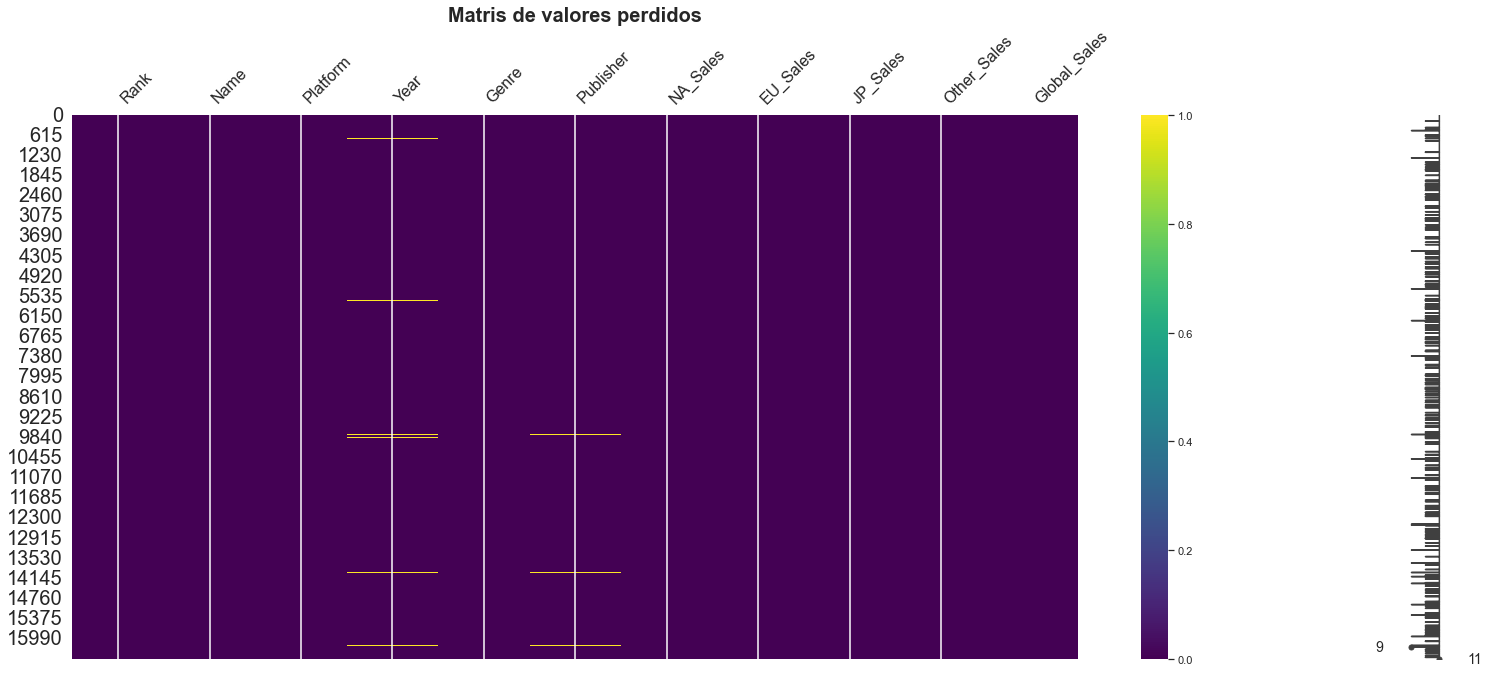

In [402]:
#Importar las librerias necesarias
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Crear una matriz que muestre los valores faltantes en cada columna
msno.matrix(df)

# Crear un mapa de calor que muestre la correlación entre los valores faltantes en cada columna
sns.heatmap(df.isnull(), cmap='viridis')

# Agregar título y estilos a la figura
plt.title("Matris de valores perdidos", fontsize=20, fontweight='bold')
sns.set_style("whitegrid")

# Mostrar el gráfico
plt.show()

**Podemos observar rápidamente que existen unos pocos datos nulos en las columnas "Year" y "Publisher".**

In [403]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [404]:
# Calcula el porcentaje de valores faltantes para cada columna del DataFrame "df"
percent_missing = df.isnull().sum() * 100 / len(df)

# Crea un nuevo DataFrame con las columnas del DataFrame original y el porcentaje de valores faltantes
missing_value_df = pd.DataFrame({'Columnas': df.columns,
                                 'Porcentaje_Missing': percent_missing})

# Ordena el nuevo DataFrame en orden descendente por el porcentaje de valores faltantes
missing_value_df = missing_value_df.sort_values(by=['Porcentaje_Missing'], ascending=False)

# Muestra el resultado
missing_value_df

,Columnas,Porcentaje_Missing
Year,Year,1.632727
Publisher,Publisher,0.349440
Rank,Rank,0.000000
Name,Name,0.000000
Platform,Platform,0.000000
Genre,Genre,0.000000
NA_Sales,NA_Sales,0.000000
EU_Sales,EU_Sales,0.000000
JP_Sales,JP_Sales,0.000000
Other_Sales,Other_Sales,0.000000


<Figure size 1080x360 with 0 Axes>

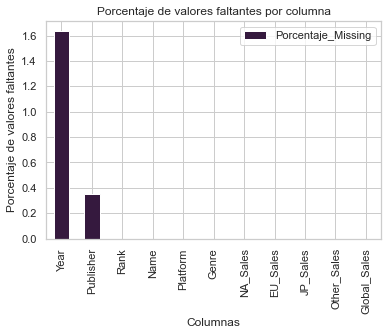

In [405]:
# Crea una figura con un tamaño de 15x5 pulgadas
plt.figure(figsize=(15,5))

# Ordena el DataFrame "missing_value_df" en orden descendente por el porcentaje de valores faltantes y crea un gráfico de barras
missing_value_df.sort_values(by=['Porcentaje_Missing'], ascending=False).plot(kind='bar')

# Agrega un título al gráfico
plt.title('Porcentaje de valores faltantes por columna')

# Agrega un título al eje x
plt.xlabel('Columnas')

# Agrega un título al eje y
plt.ylabel('Porcentaje de valores faltantes')

# Muestra el gráfico
plt.show()

 **De acuerdo con nuestros cálculos, la mayoría de los valores faltantes se encuentran en la columna “Year”, que tiene un 1,6% de valores faltantes. Por otro lado, la columna “Publisher” tiene un porcentaje mucho menor de valores faltantes, con solo un 0,35%. Dado que estos porcentajes son muy bajos, podemos concluir que los valores faltantes no tendrán un impacto significativo en nuestro análisis.**

Con la información obtenida y los datos duplicados eliminados podemos comenzar a tomar decisiones sobre qué hacer con los datos nulos:

In [406]:
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64


**Al tener muchos datos relevantes, solo eliminaremos aquellos datos que estén vacios.**

In [407]:
df.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

**Aplicar alguna técnica de reemplazo por 'Desconocido'**

**Vamos a llenar con la catergoría "Desconocido"**

In [408]:
# Define una lista con las columnas categóricas del DataFrame "df"
col_cat = ['Publisher']

# Reemplaza los valores faltantes en las columnas categóricas con el valor "Desconocido"
for i in col_cat:
    df[i] = df[i].fillna('Desconocido')

# Calcula el número total de valores en la columna "Publisher"
total_publisher = df['Publisher'].value_counts().sum()

# Muestra el resultado
total_publisher

16598

In [409]:
df.shape

(16598, 11)

**Podemos observar que la cantidad de datos de cada variable coinicide con la cantidad de filas del dataset, por lo tanto, no existen mas datos vacíos sino que se encuentran reemplazados por "Desconocido".**

#### Borrado de filas con datos nulos

In [410]:
df = df.dropna(axis=0)

In [411]:
df['Year'].isnull().sum()

0

**Podemos observar que ya no hay datos nulos en ambas variables numericas.**

### Transformo el tipo de dato de las columnas

**Debido a que trabajaremos con años, podemos utilizar variables enteras y no floats.**

In [412]:
df["Year"] = df["Year"].astype(int)

### Verifico las transformaciones realizadas en el dataset

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int32  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int32(1), int64(1), object(4)
memory usage: 1.4+ MB


**Finalmente, separo un dataframe con valores actuales, desde el año 2000 en adelante, que luego nos será de utilidad.**

In [414]:
df_new = df[df.Year >= 2000].sort_values("Year")
df_new

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
8628,8630,NCAA Final Four 2001,PS,2000,Sports,Sony Computer Entertainment,0.09,0.06,0.00,0.01,0.16
4516,4518,TimeSplitters,PS2,2000,Shooter,Eidos Interactive,0.21,0.17,0.00,0.06,0.43
8339,8341,Turok 3: Shadow of Oblivion,N64,2000,Shooter,Acclaim Entertainment,0.12,0.05,0.00,0.00,0.17
1185,1187,Smuggler's Run,PS2,2000,Racing,Take-Two Interactive,0.77,0.60,0.00,0.20,1.56
8361,8363,Nightmare Creatures II,PS,2000,Action,Konami Digital Entertainment,0.09,0.06,0.00,0.01,0.17
...,...,...,...,...,...,...,...,...,...,...,...
15714,15717,This War of Mine,PS4,2016,Action,Deep Silver,0.00,0.01,0.00,0.00,0.02
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16438,16441,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01


## ***2) Correlaciones y dependencias***

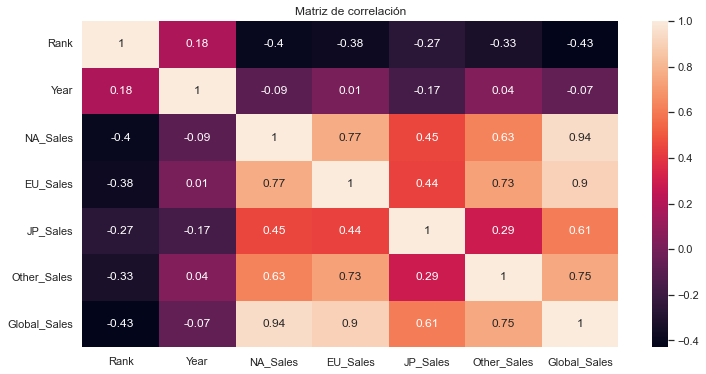

In [415]:
# Crea una figura con un tamaño de 12x6 pulgadas
plt.figure(figsize=(12, 6))

# Calcula la matriz de correlación del DataFrame "df" solo para columnas numéricas y redondea los valores a 2 decimales
corr_matrix = np.round(df.corr(numeric_only=True), 2)

# Crea un mapa de calor con la matriz de correlación
sns.heatmap(corr_matrix, annot=True)

# Agrega un título al gráfico
plt.title('Matriz de correlación')

# Muestra el gráfico
plt.show()

**Reducimos el mapa de calor para ver los datos de mayor correlación**

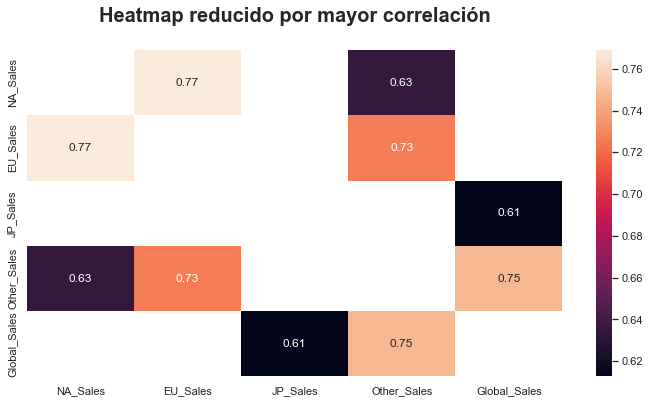

In [416]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Especificar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Obtener la matriz de correlación del conjunto de datos df
corr = df.corr(numeric_only=True)

# Especificar los valores mínimo y máximo para el filtrado
val_min = 0.6
val_max = 0.9

# Filtrar la matriz de correlación para mostrar solo las correlaciones dentro del rango especificado
mask = np.logical_or(corr < val_min, corr > val_max)
corr = corr.where(~mask)

# Eliminar las filas y columnas que no cumplen con las condiciones de filtrado
corr.dropna(axis=0, how='all', inplace=True)
corr.dropna(axis=1, how='all', inplace=True)

# Crear un heatmap a partir de la matriz de correlación filtrada
sns.heatmap(corr, annot=True)

# Agregar título y estilos a la figura
plt.title("Heatmap reducido por mayor correlación\n", fontsize=20, fontweight='bold')
sns.set_style("whitegrid")

# Mostrar el gráfico
plt.show()

Las ventas en Norte America, Europa y Japón influyen de manera significante en el resto del mundo, con una correlación de 0.82, 0.64 y 0.73 respectivamente.

Sin embargo, no existe una gran correlación entre las ventas de Norte America, Europa y Japón, seguramente porque los usuarios consumen distintos géneros o plataformas en esas regiones.

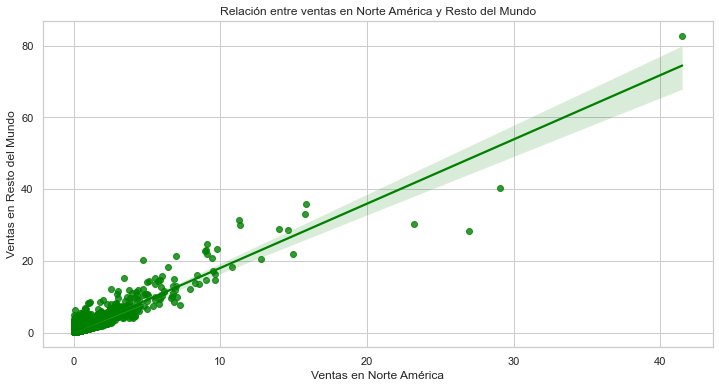

In [417]:
# Crea una figura con un tamaño de 12x6 pulgadas
plt.figure(figsize=(12, 6))

# Crea un gráfico de dispersión con una línea de regresión para mostrar la relación entre las ventas en Norte América y el resto del mundo
sns.regplot(x=df['NA_Sales'], y=df['Global_Sales'], color='green')

# Agrega un título al eje x
plt.xlabel('Ventas en Norte América')

# Agrega un título al eje y
plt.ylabel('Ventas en Resto del Mundo')

# Agrega un título al gráfico
plt.title('Relación entre ventas en Norte América y Resto del Mundo')

# Muestra el gráfico
plt.show()

Text(0.5, 1.0, 'Relación entre ventas en Europa y Resto del Mundo')

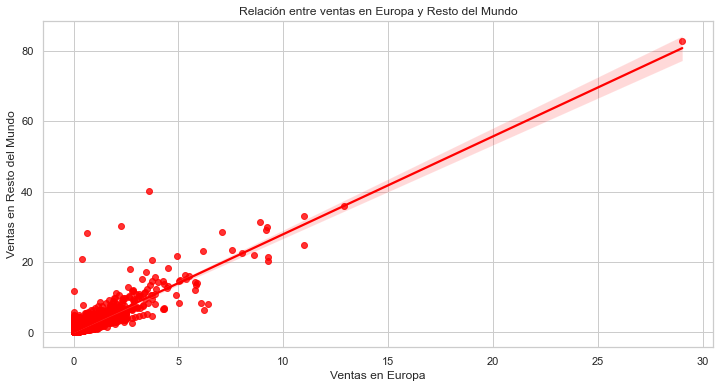

In [418]:
# Crea una figura con un tamaño de 12x6 pulgadas
plt.figure(figsize=(12, 6))
# Crea un gráfico de dispersión con una línea de regresión para mostrar la relación entre las ventas en Europa y el resto del mundo
sns.regplot(x=df['EU_Sales'], y=df['Global_Sales'], color='red')

# Agrega un título al eje x
plt.xlabel('Ventas en Europa')

# Agrega un título al eje y
plt.ylabel('Ventas en Resto del Mundo')

# Agrega un título al gráfico
plt.title('Relación entre ventas en Europa y Resto del Mundo')

# Muestra el g

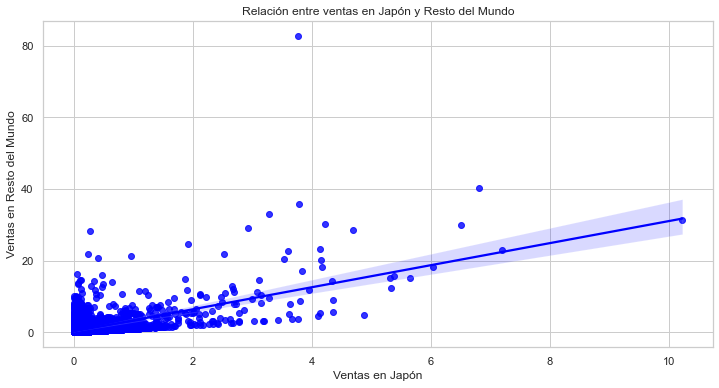

In [419]:
# Crea una figura con un tamaño de 12x6 pulgadas
plt.figure(figsize=(12, 6))

# Crea un gráfico de dispersión con una línea de regresión para mostrar la relación entre las ventas en Japón y el resto del mundo
sns.regplot(x=df['JP_Sales'], y=df['Global_Sales'], color='blue')

# Agrega un título al eje x
plt.xlabel('Ventas en Japón')

# Agrega un título al eje y
plt.ylabel('Ventas en Resto del Mundo')

# Agrega un título al gráfico
plt.title('Relación entre ventas en Japón y Resto del Mundo')

# Muestra el gráfico
plt.show()

**Como podemos observar, existe una relación lineal con respecto a la cantidad de ventas en Estados Unidos, Europa y Japón, y el Resto del Mundo. Es decir, a mayor cantidad de ventas en una de las 3 regiones mencionadas, también crecen las ventas en el Resto del Mundo. Eso quiere decir, que cuando un género, plataforma o desarrollador tiene éxito, tiene un alcance a todo el mundo y no sólo a una región.**

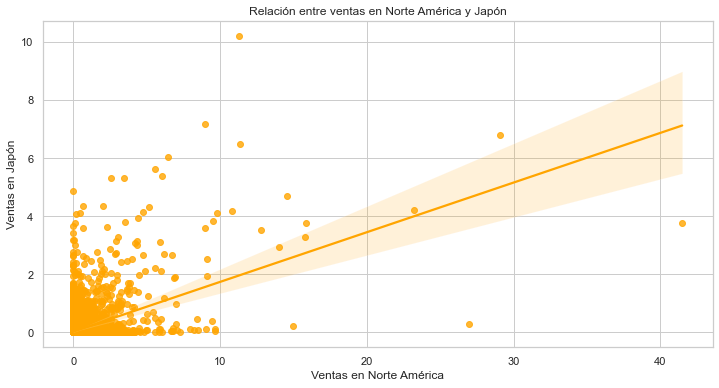

In [420]:
# Crea una figura con un tamaño de 12x6 pulgadas
plt.figure(figsize=(12, 6))

# Crea un gráfico de dispersión con una línea de regresión para mostrar la relación entre las ventas en Norte América y Japón
sns.regplot(x=df['NA_Sales'], y=df['JP_Sales'], color='orange')

# Agrega un título al eje x
plt.xlabel('Ventas en Norte América')

# Agrega un título al eje y
plt.ylabel('Ventas en Japón')

# Agrega un título al gráfico
plt.title('Relación entre ventas en Norte América y Japón')

# Muestra el gráfico
plt.show()

**Al analizar la relación entre las ventas de videojuegos en Estados Unidos y Japón, podemos observar que nuestra hipótesis inicial se mantiene: a medida que aumentan las ventas en una región, también aumentan las ventas en las otras regiones. Sin embargo, la correlación entre estas dos regiones es menor en comparación con otras regiones. Esto podría deberse a diferencias culturales y de consumo entre Estados Unidos y Japón, donde cada región tiene preferencias distintas en cuanto a géneros y plataformas de videojuegos.**

**En el futuro, podremos crear gráficos para visualizar qué géneros y plataformas son más populares en cada región**

## ***3) Análisis Estadístico***

Realizaremos una serie de preguntas e hipotesis sobre el dataset que intentaremos responder a traves de visualizaciones e interpretaciones de las mismas.

### Análisis descriptivo e inferencial de las variables historicas

#### Feature: "Year"

Proporción de ventas por año:

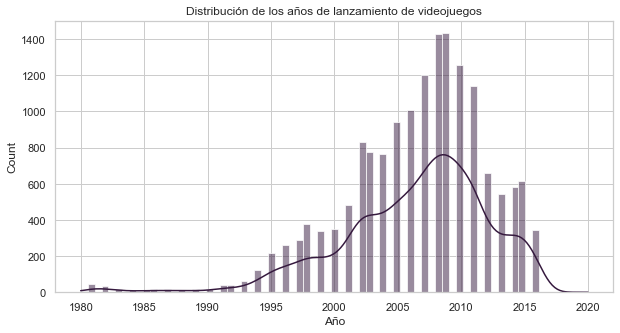

In [421]:
# Crea una figura con un tamaño de 10x5 pulgadas
f, axs = plt.subplots(figsize=(10, 5))

# Crea un histograma con la columna "Year" del DataFrame "df" y agrega una línea de densidad
ax = sns.histplot(x="Year", data=df, kde=True)

# Agrega un título al gráfico
plt.title('Distribución de los años de lanzamiento de videojuegos')

# Agrega un título al eje x
plt.xlabel('Año')

# Muestra el gráfico
plt.show()

Se logra visualizar que existe un aumento en la cantidad de ventas de juegos con el paso de los años, sin embargo, también se logra identificar una caída en las ventas después del 2010, tal vez debido al aumento de precios o a la salida de nuevos servicios de gaming en la nube.

#### Feature: "Platform"

Proporción de plataformas vendidas:

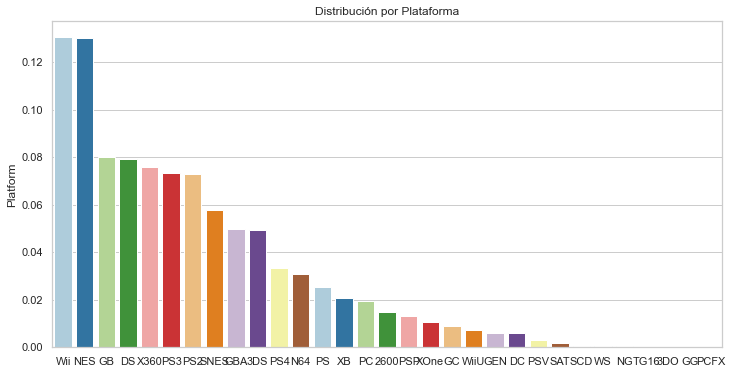

In [422]:
# Establecer el tamaño de la figura
plt.figure(figsize=(12, 6))

# Obtener los valores únicos de la columna "Platform"
x = df["Platform"].unique()

# Calcular el porcentaje de cada plataforma
y = df["Platform"].value_counts() / df["Platform"].value_counts().sum()

# Crear un gráfico de barras con los datos
ax = sns.barplot(x=x, y=y, palette="Paired")

# Establecer el título del gráfico
ax.set_title('Distribución por Plataforma')

# Mostrar el gráfico
plt.show()

** Se puede observar desde la perspectiva de las plataformas, un porcentaje considerable de ventas a lo largo de la historia de Nitendo con sus plataformas como la Nintendo wii, la Nintendo NES, la GameBoy y la Nintendo DS, dejando mucho más atras a las conocidas Xbox y Play Station.

<img src="https://e00-marca.uecdn.es/assets/multimedia/imagenes/2020/05/18/15898089940990.jpg" width="50%">


#### Feature: "Genre"

Proporción de géneros vendidos:

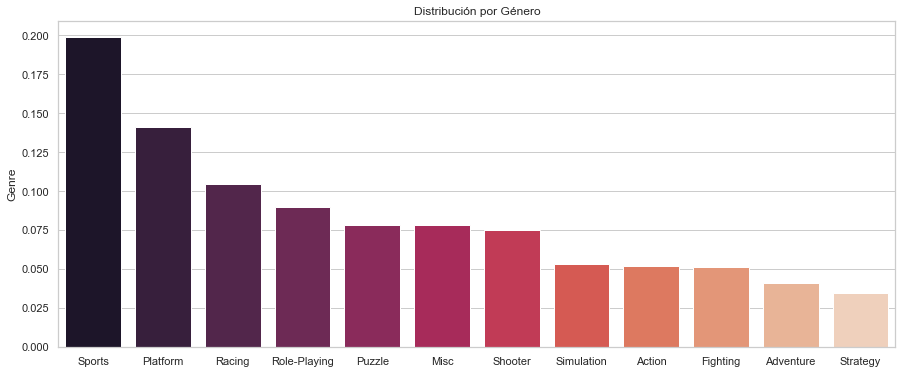

In [423]:
# Establecer el tamaño de la figura
plt.figure(figsize=(15, 6))

# Obtener los valores únicos de la columna "Genre"
x = df["Genre"].unique()

# Calcular el porcentaje de cada género
y = df["Genre"].value_counts() / df["Genre"].value_counts().sum()

# Crear un gráfico de barras con los datos
ax = sns.barplot(x=x, y=y, palette="rocket")

# Establecer el título del gráfico
ax.set_title('Distribución por Género')

# Mostrar el gráfico
plt.show()

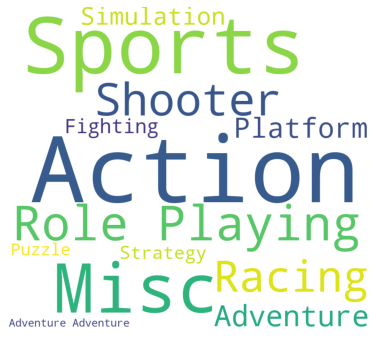

In [424]:
# Establecer el tamaño de la figura
plt.subplots(figsize=(12,6))

# Generar una nube de palabras a partir de la columna "Genre" del DataFrame "df"
wordcloud = WordCloud(background_color='White', width=800, height=720).generate(" ".join(df['Genre']))

# Mostrar la nube de palabras
plt.imshow(wordcloud)

# Ocultar los ejes del gráfico
plt.axis('off')

# Mostrar el gráfico
plt.show()

**Se puede observar que los géneros más consumidos son Sports y PLataform alcanzando casi el 30% del mercado, mientras lo siguen los juegos de Racing y Role-Playing, y en menor medida Puzzle, seguidos para nuestra sorpresa por Simulación, Adventure, Action,Shooter, Fighting, Strategy.**

#### Feature: "Publisher"

Proporción de desarrolladores con más ventas:

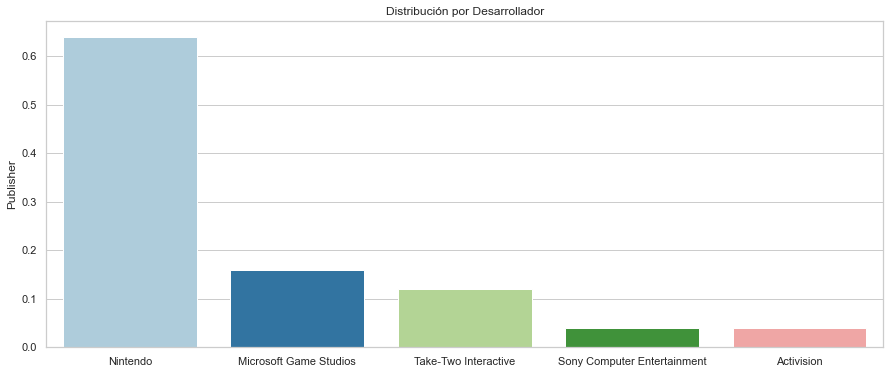

In [425]:
# Establecer el tamaño de la figura
plt.figure(figsize=(15, 6))

# Obtener los valores únicos de la columna "Publisher" de las primeras 50 filas del DataFrame "df"
x = df.head(50)["Publisher"].unique()

# Calcular el porcentaje de cada desarrollador en las primeras 50 filas del DataFrame "df"
y = df.head(50)["Publisher"].value_counts() / df.head(50)["Publisher"].value_counts().sum()

# Crear un gráfico de barras con los datos
ax = sns.barplot(x=x, y=y, palette="Paired")

# Establecer el título del gráfico
ax.set_title('Distribución por Desarrollador')

# Mostrar el gráfico
plt.show()

**Se puede observar que el desarrollador que más juegos ha vendido a lo largo de la historia fue Nintendo (Así como también comprobamos anteriormente que es el que más plataformas ha ofrecido) con casi el 65% del mercado, seguido de Microsoft, Take-two, Sony y Activision.**



---



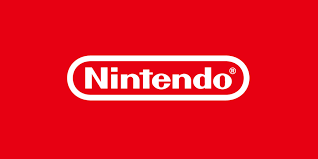







Proporción de desarrolladores con más ventas en los últimos 20 años:

#### TOP 5 JUEGOS MÁS VENDIDOS HISTÓRICOS

In [426]:
import altair as alt

# Preparar los datos
data = df.sort_values("Global_Sales", ascending=False).head(5)

# Crear un gráfico de barras con los datos
chart = alt.Chart(data).mark_bar().encode(
    y=alt.Y('Name:N', title=None),
    x=alt.X('Global_Sales:Q', title='Global Sales'),
    color=alt.Color('Genre:N', title='Genre'),
    tooltip=['Name', 'Global_Sales', 'Genre']
).properties(
    width=800,
    height=200,
    title='Top 5 Best-Selling Games of All Time'
)

chart

c:\Users\RICK\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



alt.Chart(...)

Podemos observar que en el top 5 de ventas históricas la alta demanda del genero Sports esto podemos comprobar debido a la dominacia en el historico vendido de Wii sports liderando el mismo y en 3er lugar con Wii Sports Resort. En el Top 5 tambien podemos encontrar clásicos como Mario y Mario Kart wii con los juegos de Plataforma/Racing. Podemos notar también el fuerte destacamento de los juegos de Role-Playing con los juegos de Pokemon, sin embargo, otros géneros como acción, shooter, Puzzle y aventura no han sido tan populares. 

Todos estos juegos lograron alcanzar un record entre 30 y 90 millones de ventas alrededor del mundo.

Recordemos también que las plataformas con más ventas que han acompañado estos juegos han sido las ofrecidas por Nintendo durante los 80's, los 90's y los años 2000.

### Análisis descriptivo e inferencial de las variables de la última década

#### Feature: "Platform"

Proporción de plataformas vendidas en los últimos 10 años:

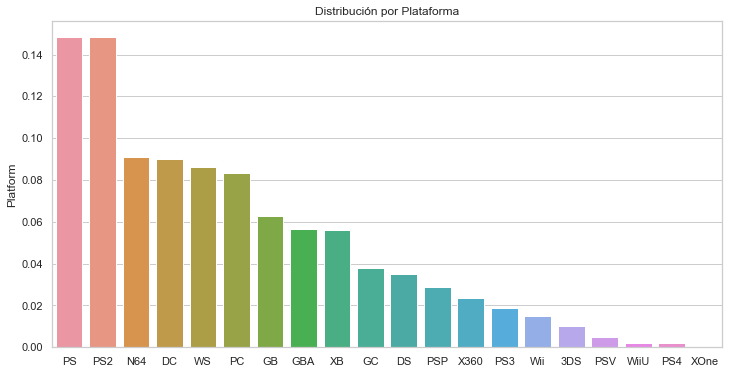

In [427]:
# Establecer el tamaño de la figura
plt.figure(figsize=(12, 6))

# Obtener los valores únicos de la columna "Platform" del DataFrame "df_new"
x = df_new["Platform"].unique()

# Calcular el porcentaje de cada plataforma en el DataFrame "df_new"
y = df_new["Platform"].value_counts() / df_new["Platform"].value_counts().sum()

# Crear un gráfico de barras con los datos
ax = sns.barplot(x=x, y=y,  )

# Establecer el título del gráfico
ax.set_title('Distribución por Plataforma')

# Mostrar el gráfico
plt.show()

Podemos notar que nuevas plataformas han aparecido la última década, logrando llevarse casi el 20% de las ventas por parte de Sony con la Playstation y la Playstation 2, seguido de Nintendo con las N64 y su Nintendo DS obteniendo apenas entre el 5 el 7,5% del mercado. Podemos también observar que aparece en este gráfico la opción de PC como plataforma de juegos gracias a los avances en procesadores y placas de video.

![texto del enlace](https://i.pinimg.com/originals/e0/bb/1a/e0bb1ae20f3a9e54a01f952a75e80def.jpg)

#### Feature: "Genre"

Proporción de géneros vendidos en los últimos 10 años:

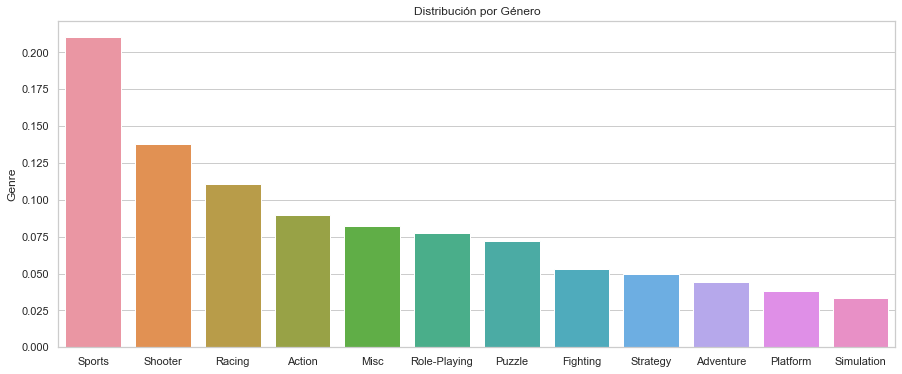

In [428]:
# Establecer el tamaño de la figura
plt.figure(figsize=(15, 6))

# Obtener los valores únicos de la columna "Genre" del DataFrame "df_new"
x = df_new["Genre"].unique()

# Calcular el porcentaje de cada género en el DataFrame "df_new"
y = df_new["Genre"].value_counts() / df_new["Genre"].value_counts().sum()

# Crear un gráfico de barras con los datos
ax = sns.barplot(x=x, y=y)

# Establecer el título del gráfico
ax.set_title('Distribución por Género')

# Mostrar el gráfico
plt.show()

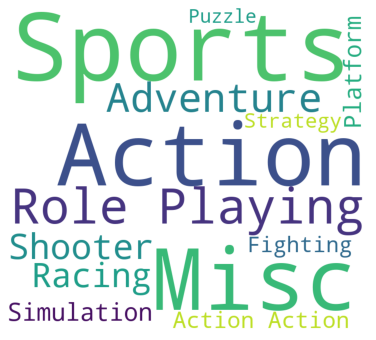

In [429]:
# Establecer el tamaño de la figura
plt.subplots(figsize=(12,6))

# Generar una nube de palabras a partir de la columna "Genre" del DataFrame "df_new"
wordcloud = WordCloud(background_color='White', width=800, height=720).generate(" ".join(df_new['Genre']))

# Mostrar la nube de palabras
plt.imshow(wordcloud)

# Ocultar los ejes del gráfico
plt.axis('off')

# Mostrar el gráfico
plt.show()

Podemos notar que los juegos de Sports han tomado mucha más relevancia en las últimas décadas logrando casi el 35% del mercado actual. El género de Role-Playing y simulation han caído a casi el 15% de las ventas del mercado, compitiendo directamente con los juegos de tipo Shooter, Acción y Racing que lograron tener una mayor popularidad al salir al mercado de la mano de las consolas de Playstation.

Es notable cómo los juegos de Role-Playing han dejado de tener un gran consumo así como los juegos de tipo Puzzle.


#### Feature: "Publisher"

Proporción de desarrolladores con más ventas en los últimos 10 años:

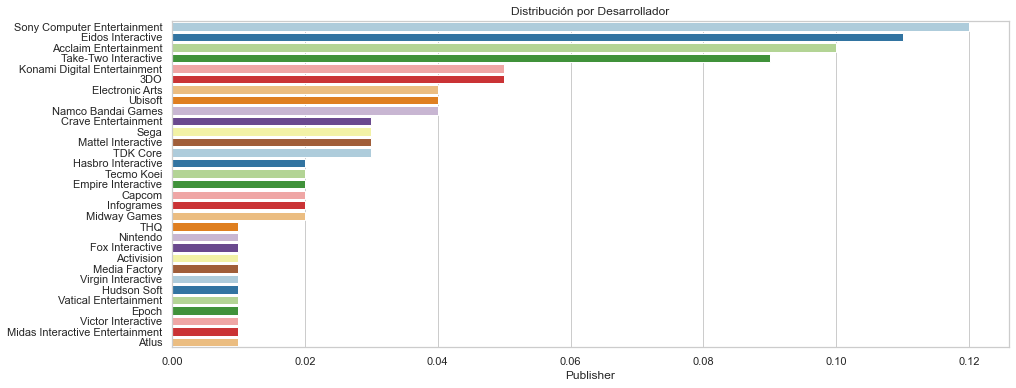

In [430]:
import seaborn as sns

# Establecer el tamaño de la figura
plt.figure(figsize=(15, 6))

# Obtener los valores únicos de la columna "Publisher" de las primeras 100 filas del DataFrame "df_new"
x = df_new.head(100)["Publisher"].unique()

# Calcular el porcentaje de cada desarrollador en las primeras 100 filas del DataFrame "df_new"
y = df_new.head(100)["Publisher"].value_counts() / df_new.head(100)["Publisher"].value_counts().sum()

# Crear un gráfico de barras horizontal con los datos y especificar la paleta de colores
ax = sns.barplot(x=y, y=x, palette="Paired")

# Establecer el título del gráfico
ax.set_title('Distribución por Desarrollador')

# Mostrar el gráfico
plt.show()

Se puede observar que luego de los 2000 han aparecido una enorme variedad de desarrolladores de juegos y software, desatacando a Sony Computer Etertainment y Eidos interactive como proveedores de software y servicios a desarrolladores de juegos con el 20% del mercado, seguido de empresas más conocidas en el ambiente gamer como Acclaim Entertainment, Take two, Konami y 3DO.

Con el aumento del consumo de juegos de acción y aventura, podemos intuir que vino de la mano de la nueva generación de consolas como Playstation.

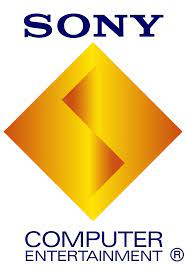







#### TOP 5 JUEGOS MÁS VENDIDOS


In [431]:
import altair as alt

# Preparar los datos
data = df_new.sort_values("Global_Sales", ascending=False).head(5)

# Crear un gráfico de barras con los datos
chart = alt.Chart(data).mark_bar().encode(
    y=alt.Y('Name:N', title=None),
    x=alt.X('Global_Sales:Q', title='Global Sales'),
    color=alt.Color('Genre:N', title='Genre'),
    tooltip=['Name', 'Global_Sales', 'Genre']
).properties(
    width=800,
    height=200,
    title='Top 5 Best-Selling Games'
)

# Mostrar el gráfico
chart

c:\Users\RICK\AppData\Local\Programs\Python\Python310\lib\site-packages\altair\utils\core.py:317: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



alt.Chart(...)

**Podemos observar que en el top 5 de ventas de la última década que el género Sports ha superado a los demás en ventas de forma considerable con mas de 80 millones de ventas, siendo acompañado por los juegos de tipo Racing y Plataform. Liderando el Top 5 podemos encontrar grandes juegos como Wii Sports, Mario Kart Wii, Wii Sports resort, New Super Mario Bros, Wii Play, New super Mario Bros Wii, Nintendogs y Mario Kart Ds.**

Todos estos juegos lograron alcanzar un record entre 25 y 85 millones de ventas alrededor del mundo.

Se puede observar la dominancia de Nintedo liderando el Top 5 de ventas en la ultima decada

#### RECORD DE VENTAS POR REGIÓN:

##### ESTADOS UNIDOS:


<AxesSubplot:>

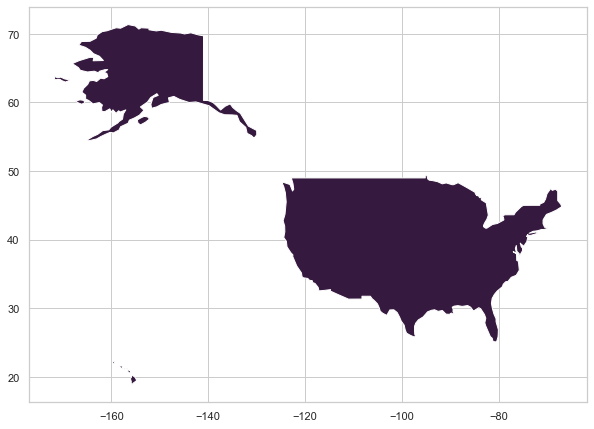

In [432]:
import geopandas as gpd

# Cargar el conjunto de datos de los estados de EE. UU.
us_states = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us_states = us_states[us_states['name'].isin(['United States of America'])]

# Visualizar los estados de EE. UU.
us_states.plot(figsize=(10, 8))



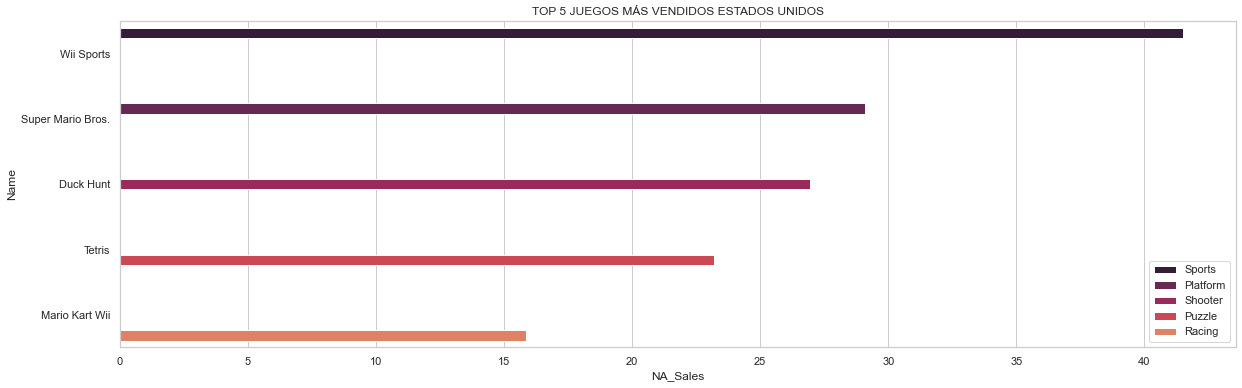

In [433]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='NA_Sales',hue='Genre',data=df.sort_values('NA_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

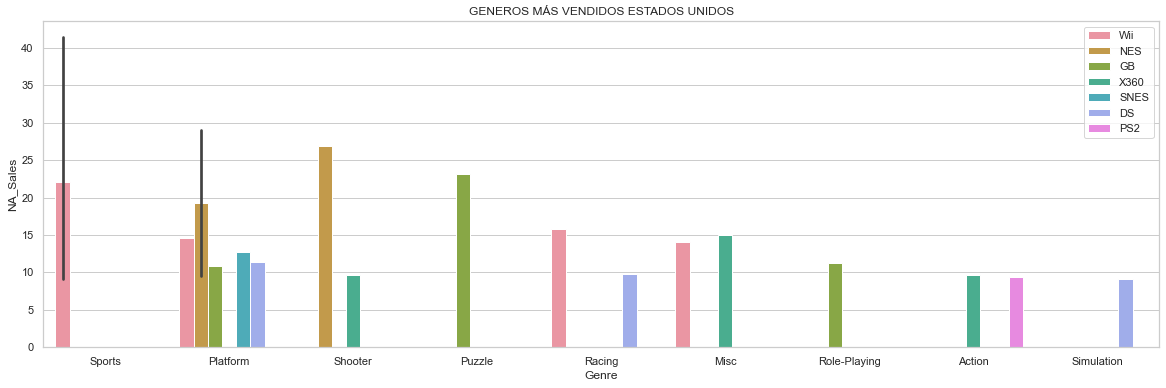

In [434]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='NA_Sales', hue='Platform',data=df.sort_values('NA_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

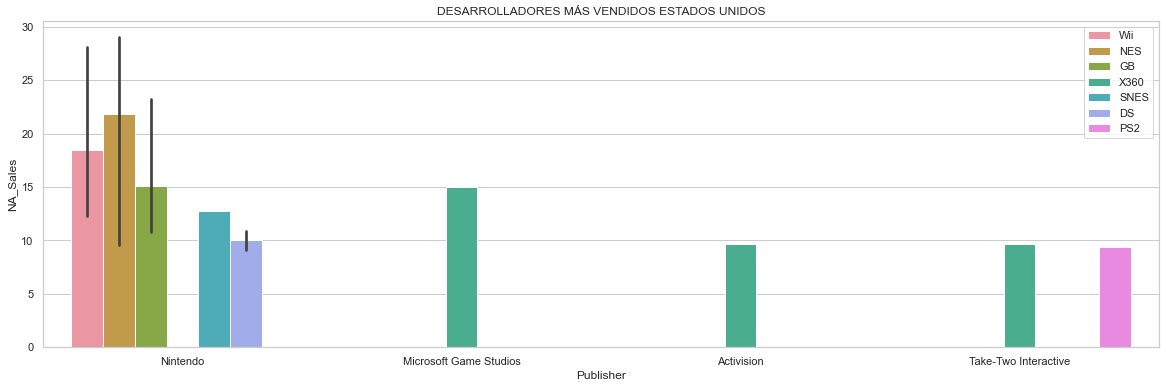

In [435]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='NA_Sales', hue='Platform',data=df.sort_values('NA_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS ESTADOS UNIDOS')
plt.legend()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Estados Unidos se lo lleva el género de Deportes de la mano de Nintendo Wii, más precisamente con el juego Wii Sports con más de 40 millones en ventas.

También podemos observar que los americanos han tenido un consumo preferente por juegos y consolas de Nintendo, seguido de desarrollos propios del país producidos por Microsoft Games y Activision, acompañados por plataformas como XBox. 

Finalmente vemos que en Estados Unidos existe un consumo de juegos de género muy variado, liderando las ventas los juegos de Deporte, Plataforma y Shooter, que inclusive se ofertan para distintas consolas.

Es interesante ver que en Estados Unidos lideran los juegos y consolas japoneses, y cómo los juegos de deporte y disparos tienen gran relevancia.

##### JAPÓN:

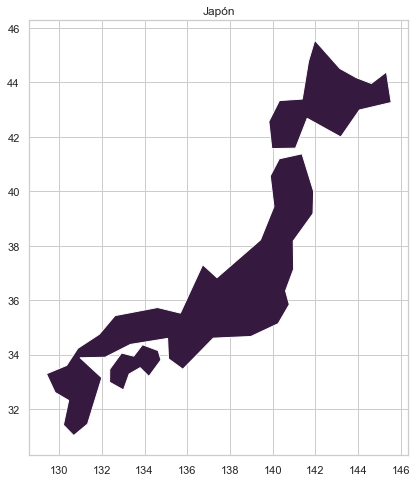

In [436]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos de los países del mundo
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filtrar para obtener solo Japón
japan = world[world['name'] == 'Japan']

# Visualizar Japón
fig, ax = plt.subplots(figsize=(10, 8))
japan.plot(ax=ax)
plt.title('Japón')
plt.show()


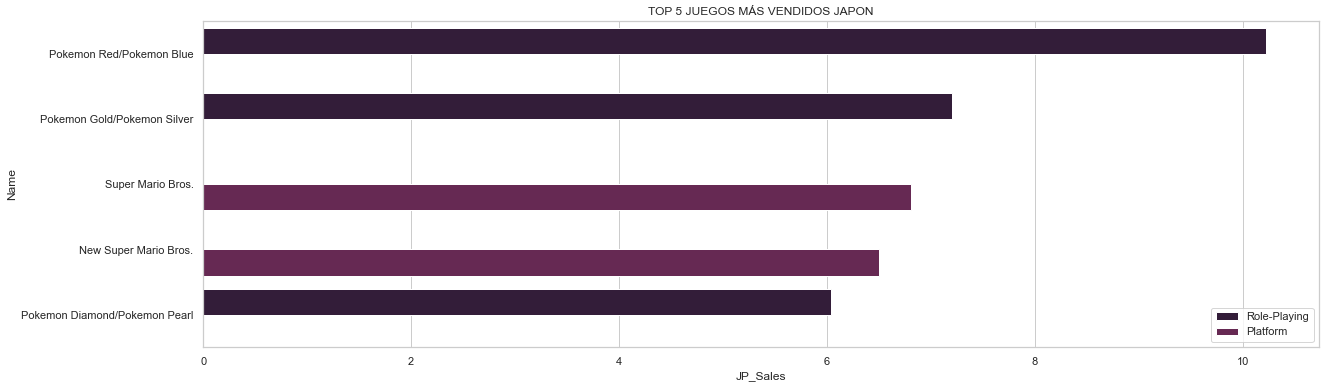

In [437]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='JP_Sales',hue='Genre',data=df.sort_values('JP_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS JAPON')
plt.legend()

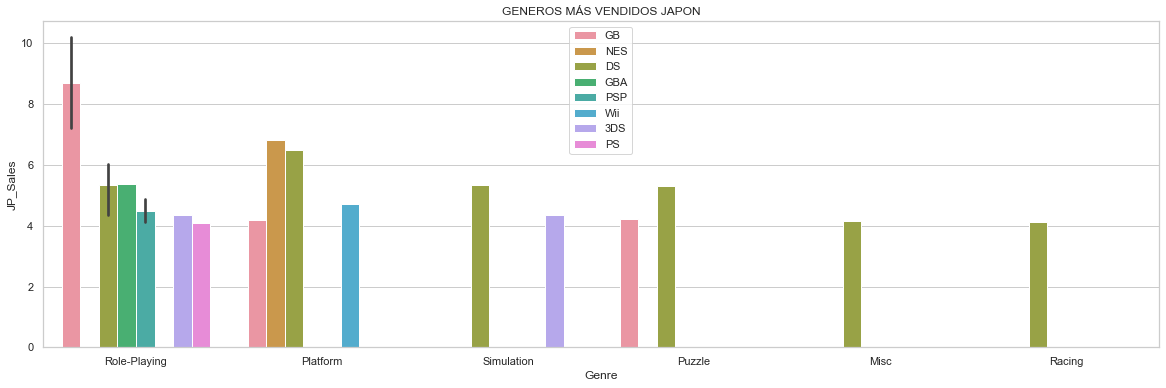

In [438]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='JP_Sales', hue='Platform',data=df.sort_values('JP_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS JAPON')
plt.legend()

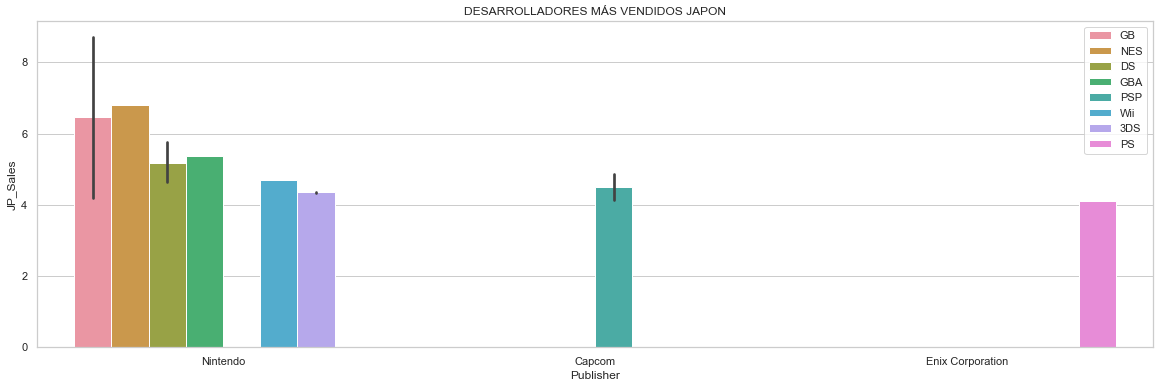

In [439]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='JP_Sales', hue='Platform',data=df.sort_values('JP_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS JAPON')
plt.legend()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Japón se lo lleva el género de Role-Playing o RPG, más precisamente con los juegos Pokemon Red y Pokemos Blue con más de 10 millones en ventas.

También podemos observar que los japoneses han tenido un consumo preferente por juegos y consolas propios del país, producidos por Nintendo en mayor proporsión, seguidos de otros desarrolladores como Capcom que han tenido grandes entregas como Resident Evil y Street Fighter. 

Finalmente vemos que en Japón existe un consumo de juegos de género no tan variado, liderando las ventas los juegos de RPG, para todas las consolas disponibles de Nintendo. 
Cabe destacar a la Nintendo DS, que si bien no ha superado en ventas a la Nintendo NES o a la GameBoy, ha permanecido como plataforma definitiva para géneros menos populares como Simulación, Puzzle, Misc y Carreras.

Es interesante ver que en Japón lideran los juegos y consolas nacionales, notandose una menor diversidad de consumos de géneros, y cómo las plataformas de Estados Unidos han tenido apenas relevancia con ventas de la Playstation Vita, lo cual deja en evidencia que Japón tiene preferencia por plataformas portátiles.

##### EUROPA:

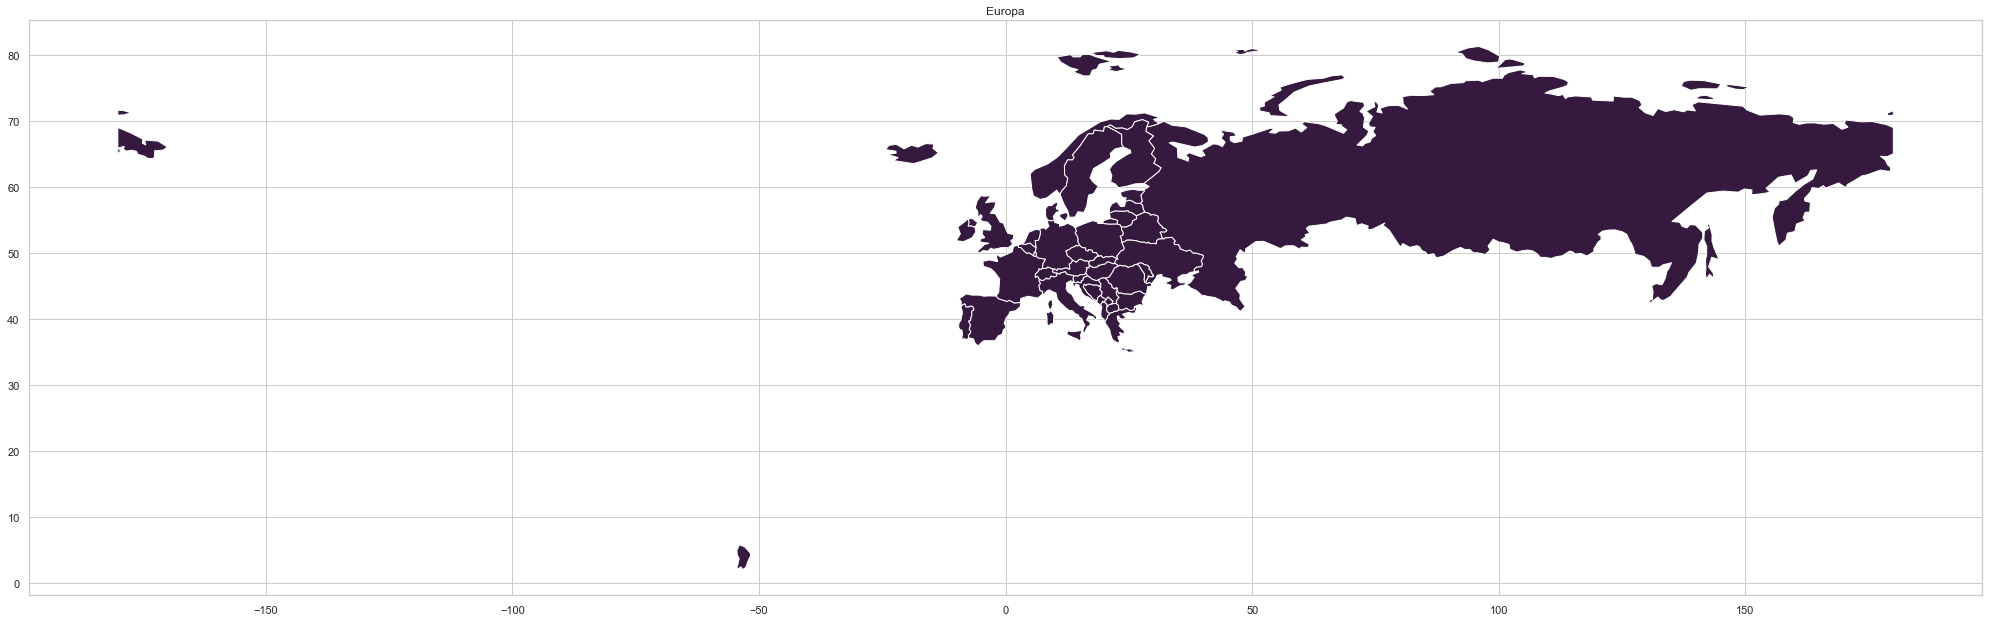

In [440]:
import geopandas as gpd
import matplotlib.pyplot as plt 

# Cargar el conjunto de datos de los países europeos
europa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europa =europa[europa['continent'].isin(['Europe'])]

# Visualizar los países europeos
fig, ax = plt.subplots(figsize=(35, 90))
europa.plot(ax=ax)
plt.title('Europa')
plt.show()


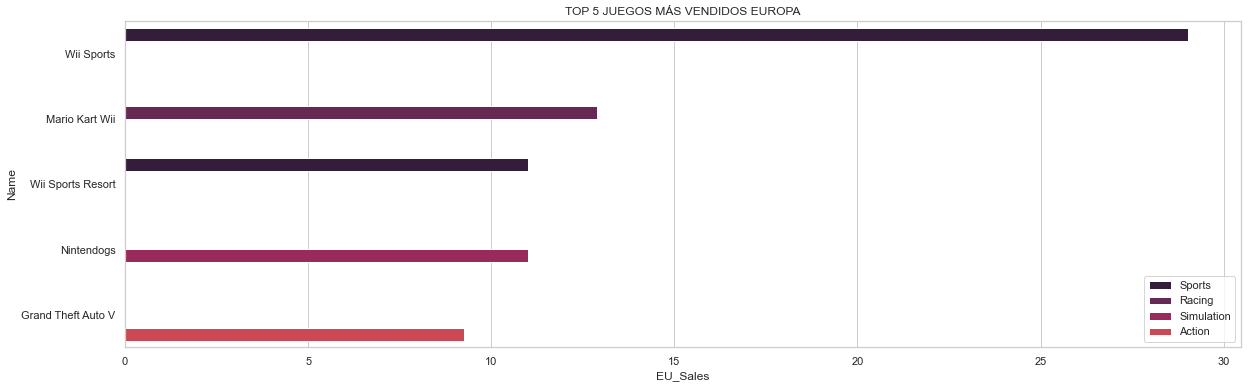

In [441]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='EU_Sales',hue='Genre',data=df.sort_values('EU_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS MÁS VENDIDOS EUROPA')
plt.legend()

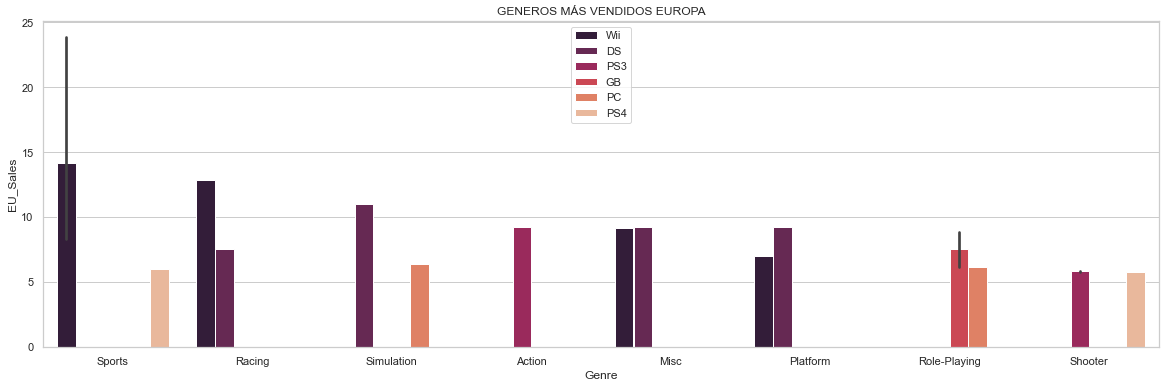

In [442]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='EU_Sales', hue='Platform',data=df.sort_values('EU_Sales', ascending=False).head(20)).set_title('GENEROS MÁS VENDIDOS EUROPA')
plt.legend()

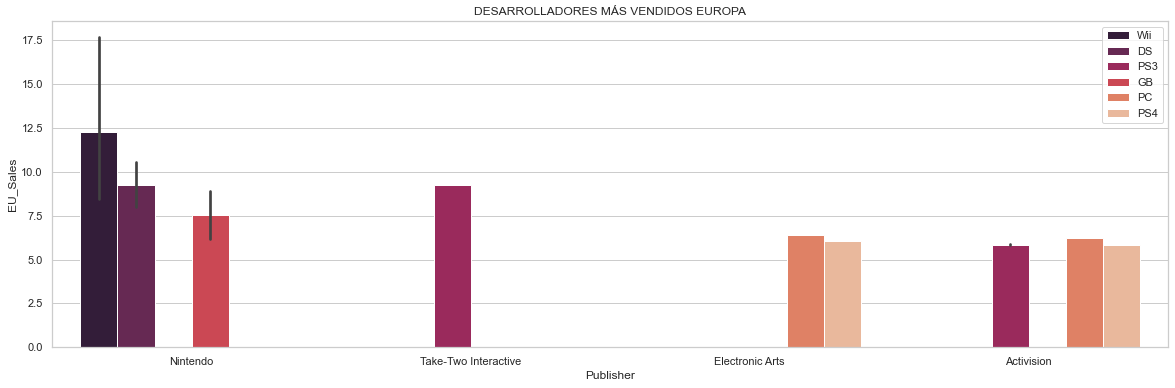

In [443]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='EU_Sales', hue='Platform',data=df.sort_values('EU_Sales', ascending=False).head(20)).set_title('DESARROLLADORES MÁS VENDIDOS EUROPA')
plt.legend()

Tras analizar las visualizaciones anteriores, se puede concluir que en Europa el género de Deportes lidera el record de ventas gracias a Nintendo Wii, especialmente con el juego Wii Sports, que ha alcanzado casi 30 millones en ventas. Además, se observa un consumo muy similar al de Estados Unidos, con una preferencia por juegos producidos por Nintendo, seguidos por desarrolladores americanos como Electronic Arts y Activision.

En cuanto a los géneros de juegos preferidos en Europa, se destaca la diversidad, aceptando lo mejor tanto de Estados Unidos como de Japón. Los juegos de Deportes, Carreras, Simulación y Acción lideran las ventas, compitiendo en plataformas como Nintendo y Playstation. Aunque la PC no ha superado en ventas a las consolas mencionadas, se ha consolidado como una alternativa gracias a la posibilidad de jugar juegos de cualquier desarrollador.

Es interesante ver que, a diferencia de Estados Unidos y Japón, los europeos consumen una mayor diversidad de géneros y plataformas, con una preferencia por aquellos que tienen un cierto vínculo con la realidad, como Deportes, Carreras y Simulación. A pesar de liderar los juegos y consolas japoneses, Europa se destaca por su amplio espectro de preferencias.